<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/NN_airfoil_S809_combined_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install google-auth

In [7]:
from google.colab import auth
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=6, h1 = 61, h2 = 60, h3 = 40, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.dropout1 = nn.Dropout(0.25)
    self.fc2 = nn.Linear(h1,h2)
    self.dropout2 = nn.Dropout(0.25)
    self.fc3 = nn.Linear(h2,h3)
    self.dropout3 = nn.Dropout(0.25)
    self.out = nn.Linear(h3,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = self.dropout1(x)
    x = F.sigmoid(self.fc2(x))
    x = self.dropout2(x)
    x = F.sigmoid(self.fc3(x))
    x = self.dropout3(x)
    x = self.out(x)

    return x

In [11]:
torch.manual_seed(42)

model = Model()

In [12]:
# Read the data set -  Airfoil S809
df1 = pd.read_csv("/content/drive/MyDrive/data_set1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/data_set2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/data_set3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/data_set4.csv")

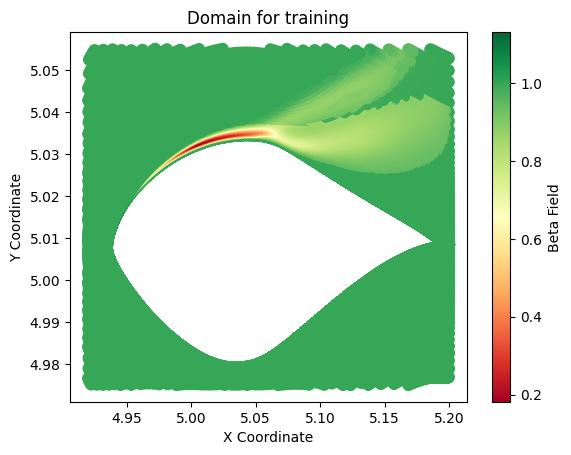

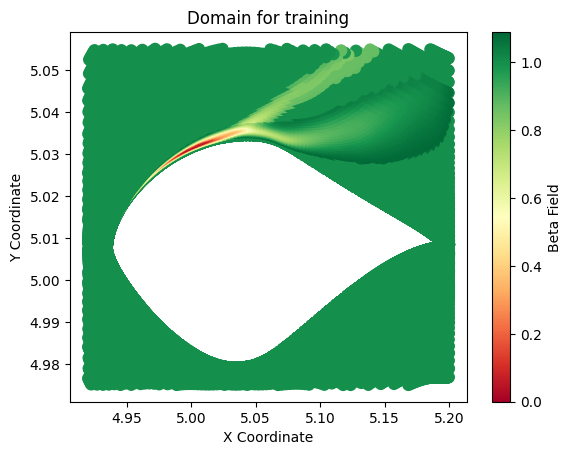

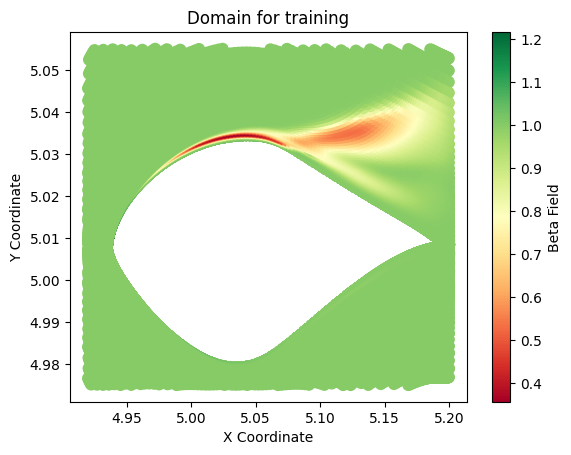

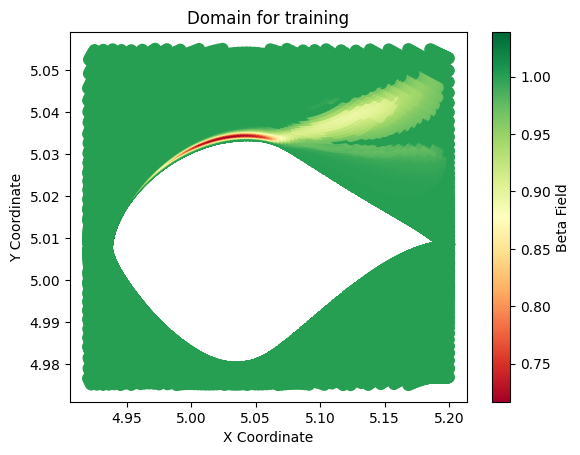

In [14]:
# Combine data
frames = [df1, df2, df3, df4]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])
  ff6 = np.array(item['feature6'])

  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  # #####################################################################
  # # Cleaning the beta field in the wake region
  # for k in range(len(xc)):
  #   if xc[k] >= 5.2 and xc[k] <= 5.3:
  #     if yc[k] >= 5.00 and yc[k] <= 4.96:
  #       b2.append(b[k])

  # for j in range(len(xc)):
  #   if xc[j] > 5.15 or yc[j]>5.04:
  #     b[j] = np.mean(b2)

  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.92 and xc[i]<=5.20:
      if yc[i]>=4.975 and yc[i]<=5.055:
        x1.append(xc[i])
        y1.append(yc[i])
        b1.append(b[i])
        f1.append(ff1[i])
        f2.append(ff2[i])
        f3.append(ff3[i])
        f4.append(ff4[i])
        f5.append(ff5[i])
        f6.append(ff6[i])

  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  'feature4': np.array(f4),
  'feature5': np.array(f5),
  'feature6': np.array(f6)
  }


  ff.append(pd.DataFrame(modified_data))

  # # #####################################################################
  # # Plotting cleaned data
  # ################################
  # nx = []
  # ny = []
  # nb = []


  # # Filter data for the specified range of coordinates
  # for i in range(len(xc)):
  #   if xc[i]>=4.9 and xc[i]<=5.3:
  #     if yc[i]>=4.925 and yc[i]<=5.075:
  #       nx.append(xc[i])
  #       ny.append(yc[i])
  #       nb.append(b[i])

  # Create a scatter plot
  plt.scatter(x1, y1, c=b1,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  plt.colorbar(label='Beta Field')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Domain for training')
  plt.show()
###############################################################################

df = pd.concat(ff)


# Data for beta>1.02 or beta<0.98
df_filtered = df[(df['beta'] < 0.995) | (df['beta'] > 1.005)]

# df_filtered = df[df['beta'] != 1.0]

# df_filtered = df

<Axes: xlabel='feature6', ylabel='Density'>

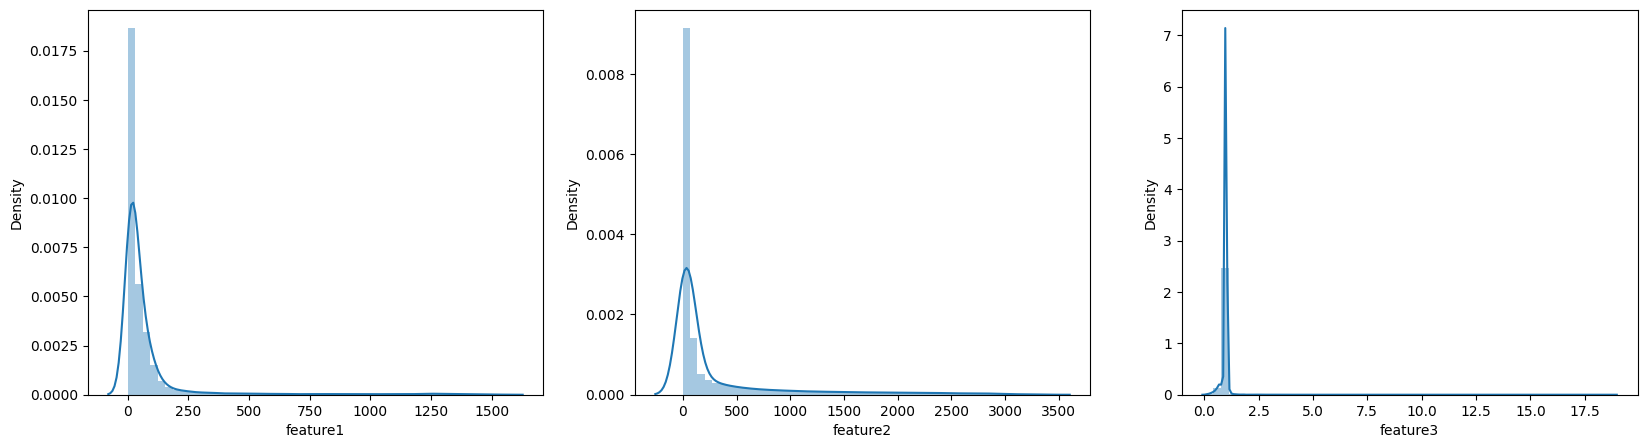

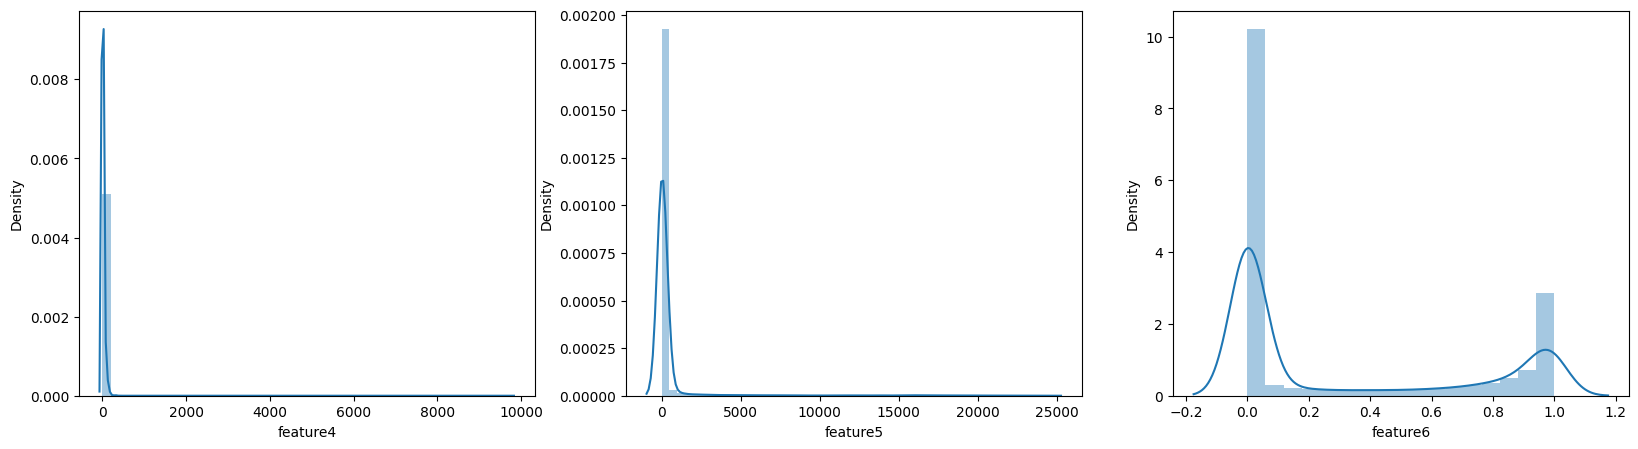

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




# Preprocess Features
df1 = df_filtered.drop(['x','y','beta'],axis=1)
df2 = df_filtered.drop(['x','y','feature1','feature2','feature3','feature4','feature5','feature6'],axis=1)


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df1['feature1'])
plt.subplot(1,3,2)
sns.distplot(df1['feature2'])
plt.subplot(1,3,3)
sns.distplot(df1['feature3'])

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df1['feature4'])
plt.subplot(1,3,2)
sns.distplot(df1['feature5'])
plt.subplot(1,3,3)
sns.distplot(df1['feature6'])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler





# Fill missing values with the mean
df1 = df1.fillna(df1.mean())
# m = df1.max()
# df1 = df1.div(m)

df1.min(),df1.max()

(feature1    0.016143
 feature2    1.097497
 feature3    0.012101
 feature4    0.001637
 feature5    0.000731
 feature6    0.000000
 dtype: float64,
 feature1     1547.650392
 feature2     3343.469421
 feature3       18.876581
 feature4     9756.682568
 feature5    24298.278480
 feature6        0.999971
 dtype: float64)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler





# Fill missing values with the mean
df1 = df1.fillna(df1.mean())
# m = df1.max()
# df1 = df1.div(m)

df1.min(),df1.max()



(feature1    0.016143
 feature2    1.097497
 feature3    0.012101
 feature4    0.001637
 feature5    0.000731
 feature6    0.000000
 dtype: float64,
 feature1     1547.650392
 feature2     3343.469421
 feature3       18.876581
 feature4     9756.682568
 feature5    24298.278480
 feature6        0.999971
 dtype: float64)

In [20]:
# Standardization
# standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler(feature_range=(0, 10000))
# transformer = Normalizer()
scaler = RobustScaler(with_centering=False)

# Features
# X = min_max_scaler.fit_transform(df1)
X = df1.values

# # Target
# # y = df_filtered['beta'].values
# # y = standard_scaler.fit_transform(df2)
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# y = min_max_scaler.fit_transform(df2)
# # y = scaler.fit_transform(df2)
y = df2.values

In [21]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001,weight_decay=0.0000001)
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001,weight_decay=0.0)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [27]:
# Train
epochs = 4000
losses = []
for i in range(epochs):
  # go forward and predict
  y_pred = model.forward(X_train)

  # Measure the loss
  loss = criterion(y_pred,y_train)

  # Keep track of the losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.029239363968372345
Epoch: 10 and loss: 0.028883904218673706
Epoch: 20 and loss: 0.02886214852333069
Epoch: 30 and loss: 0.028615189716219902
Epoch: 40 and loss: 0.028369776904582977
Epoch: 50 and loss: 0.02824651636183262
Epoch: 60 and loss: 0.02835770510137081
Epoch: 70 and loss: 0.027842504903674126
Epoch: 80 and loss: 0.028149737045168877
Epoch: 90 and loss: 0.027855265885591507
Epoch: 100 and loss: 0.027750911191105843
Epoch: 110 and loss: 0.02770957536995411
Epoch: 120 and loss: 0.027722209692001343
Epoch: 130 and loss: 0.0278573390096426
Epoch: 140 and loss: 0.02797619067132473
Epoch: 150 and loss: 0.027174023911356926
Epoch: 160 and loss: 0.027581151574850082
Epoch: 170 and loss: 0.027278918772935867
Epoch: 180 and loss: 0.02743416652083397
Epoch: 190 and loss: 0.027151895686984062
Epoch: 200 and loss: 0.026320219039916992
Epoch: 210 and loss: 0.026666801422834396
Epoch: 220 and loss: 0.026647496968507767
Epoch: 230 and loss: 0.026255523785948753
Epoch: 240 

In [28]:

# Evaluate Model
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [31]:
importance = model.feature_importances_


AttributeError: 'Model' object has no attribute 'feature_importances_'